In [1]:
import numpy as np
import matplotlib.pyplot as plt

from openTSNE import TSNE

In [2]:
import matplotlib.colors as mcolors

TABLEU_COLOURS = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                  (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                  (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                  (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                  (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]) / 255

In [3]:
npz = np.load('infer.npz', allow_pickle=True)

hs = npz['hs']
accs = npz['accs']
infos = list(npz['infos'])

In [4]:
print(f'hs: {hs.shape} | accs: {len(accs)} | infos: {len(infos)}')

hs: (2575, 128) | accs: 2575 | infos: 2575


In [5]:
embedding = TSNE().fit(hs)

In [6]:
zipped = list(zip(hs, accs, infos))
zipped.sort(key = lambda x: x[2][1]) # Sort by dataset
zipped.sort(key = lambda x: x[2][2]) # Sort by emotion

hs, accs, infos = zip(*zipped)
hs = np.array(hs)

print(f'hs: {hs.shape} | accs: {len(accs)} | infos: {len(infos)}')

hs: (2575, 128) | accs: 2575 | infos: 2575


In [7]:
emotions = sorted(list(set([info[2] for info in infos])))
print(emotions)

datasets = sorted(list(set([info[1].split('_')[0] for info in infos])))
print(datasets)

['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'sleepy', 'surprise']
['ACRYL', 'AESDD', 'ANAD', 'BAVED', 'CREMA-D', 'CaFE', 'EEKK', 'EMOV', 'JL', 'RAVDESS', 'SAVEE', 'ShEMO', 'TESS', 'URDU', 'VIVAE']


In [8]:
embedding = TSNE().fit(hs)

Emotion anger: 5
Emotion disgust: 7
Emotion fear: 4
Emotion happiness: 9
Emotion neutral: 7
Emotion sadness: 7
Emotion sleepy: 6
Emotion surprise: 8


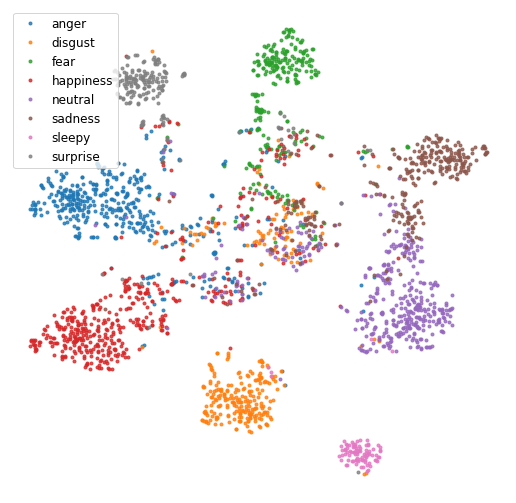

In [9]:
plt.figure(figsize=(9, 9))
for emotion in emotions:
    print(f'Emotion {emotion}: {len(emotion)}')
    boolean_mask = [info[2] == emotion for info in infos]
    plt.plot(embedding[boolean_mask, 0], 
             embedding[boolean_mask, 1], '.', alpha=0.8)

plt.legend(emotions, fontsize=12)
plt.axis('off')
plt.show()

In [10]:
sum([acc == 1.0 for acc in accs])

2165

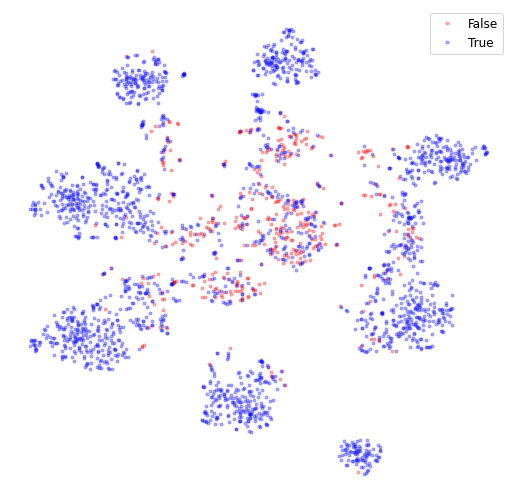

In [11]:
# Group color by dataset origin

plt.figure(figsize=(9, 9))
for b in [0.0, 1.0]:
    boolean_mask = [acc == b for acc in accs]
    c = 'r' if b == 0.0 else 'b'
    plt.plot(embedding[boolean_mask, 0], 
             embedding[boolean_mask, 1], '.', color=c, alpha=0.3)

plt.legend(['False', 'True'], fontsize=12)
plt.axis('off')
plt.show()

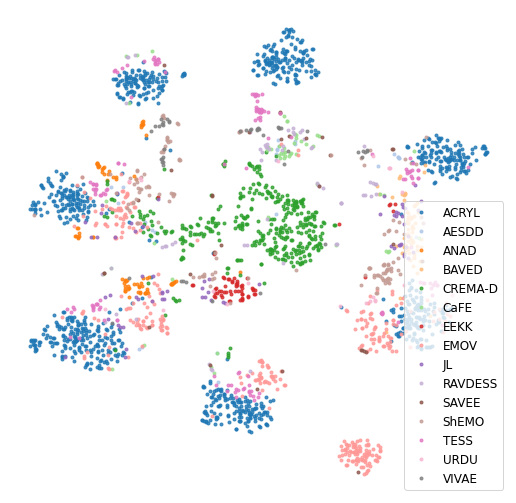

In [12]:
# Red and Blue according to prediction

plt.figure(figsize=(9, 9))
for i,dataset in enumerate(datasets):
    boolean_mask = [dataset in info[1] for info in infos]
    plt.plot(embedding[boolean_mask, 0], 
             embedding[boolean_mask, 1], 
             '.', color = TABLEU_COLOURS[i % len(TABLEU_COLOURS)], 
             alpha=0.8)

plt.legend(datasets, fontsize=12)
plt.axis('off')
plt.show()